# Packages & Includes

In [7]:
using Plots
using StatsBase
using LinearAlgebra
using Statistics
using JLD2
using Dates
using LsqFit
using StaticArrays

# data structure module (needs to be module to avoid overwriting local variables in REPL scope)
include("SpinSimParams.jl")
using .SpinSimParams

# function libraries
include("spin_sims.jl");

# Load data

In [8]:
@load "looprun_06-16-2020_data.jld2" M_list params


2-element Array{Symbol,1}:
 :M_list
 :params

# Plotting

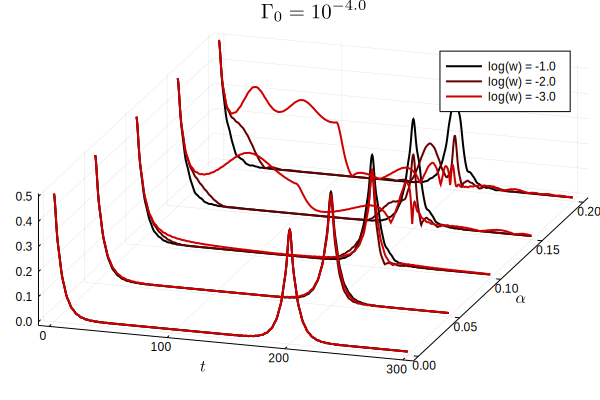

In [362]:
using LaTeXStrings


plt1 = plot()

α = params.α
ω = params.ω
Lj = params.Lj

var3 = 5

for var2 = [10,6,2]#1:size(ω,1)
    for var1 = [1,6,11,16,21]#1:size(α,1)
        tar_M = M_list[var1,var2,var3]
        t = LinRange(0, 300, size(tar_M, 1));
        #lab_here = string("a = ",α[var1],", w = ",ω[var2]);
        #lab_here = string("a = ",α[var1]);

        c_str = 1 - var2/size(ω,1)
        color_here = RGBA(c_str,0,0,1)

        if (var1 == 1) # just for legend
        plot!([0],[0],
            linecolor=color_here, lw=2,  label=string("log(w) = ",log10(ω[var2])))
        end
        
        plot!(t, (α[var1]) .+ 0 .* collect(t), broadcast(abs, tar_M),
            linecolor=color_here, lw=2, label=false, camera=(25,65))            
        
    end
end
#title!(string(L"\Gamma_{0} = 10^{",log10(Lj[var3][1][1,2].^2),"}"))
title!(latexstring(raw"$\Gamma_{0} = 10^{",string(log10(Lj[var3][1][1,2].^2)),raw"}$"))
#xaxis!([180,220])
xlabel!(L"t")
ylabel!(L"\alpha")

display(plt1)
#savefig(plt1,"dissipation_runs_overview.png")

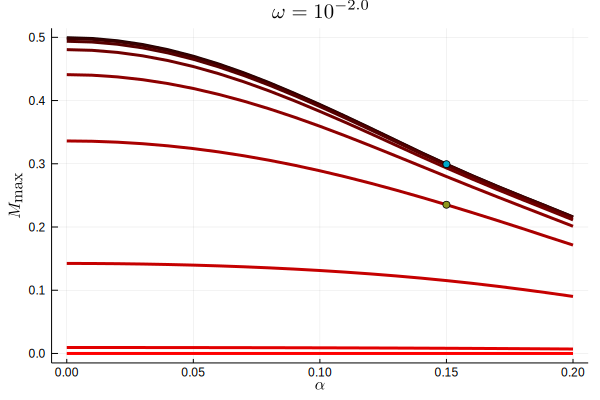

In [367]:
tar_M = M_list[1,1,1]
t = LinRange(0, 300, size(tar_M, 1));
echo_idx = 628;
t_width = 150;
t_range = echo_idx-t_width:echo_idx+t_width

M_max = zeros(size(M_list))
for var1 = 1:size(α,1)
    for var2 = 1:size(ω,1)
        for var3 = 1:size(Lj,1)
            M_max[var1,var2,var3] = maximum(broadcast(abs,M_list[var1,var2,var3][t_range]))
        end
    end
end


plt = plot()

var2 = 6;
tar_1 = [16,var2,6]
tar_2 = [16,var2,1]

for var3 = 1:size(Lj,1)
    c_str = var3/size(Lj,1)
    color_h = RGBA(c_str,0,0,1)
    plot!(α,M_max[:,var2,var3],linecolor=color_h,lw=3,legend=false)
end

scatter!([α[tar_1[1]]],[ M_max[tar_1[1],tar_1[2],tar_1[3]] ])
scatter!([α[tar_2[1]]],[ M_max[tar_2[1],tar_2[2],tar_2[3]] ])

title!(string(raw"$\omega = 10^{",log10(ω[var2]),raw"}$"))
xlabel!(L"\alpha")
ylabel!(L"M_\textrm{max}")

display(plt)
#savefig(plt,"max_echo_mag.png")


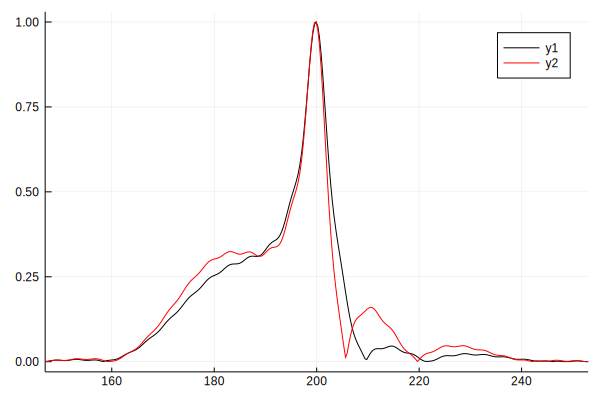

In [368]:
M_norm = M_list./M_max
#tar_1 = [16,6,2]
#tar_2 = [14,6,9]

plt = plot()
plot!(t,broadcast(abs,M_norm[tar_1[1],tar_1[2],tar_1[3]]),color=RGB(0,0,0))
plot!(t,broadcast(abs,M_norm[tar_2[1],tar_2[2],tar_2[3]]),color=RGB(1,0,0))
xaxis!([150,250])
yaxis!([0, 1])

display(plt)

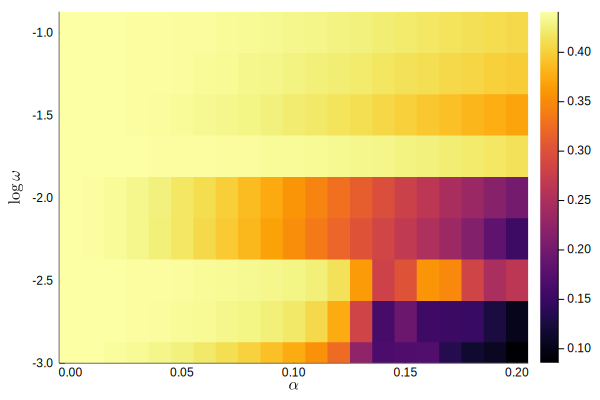

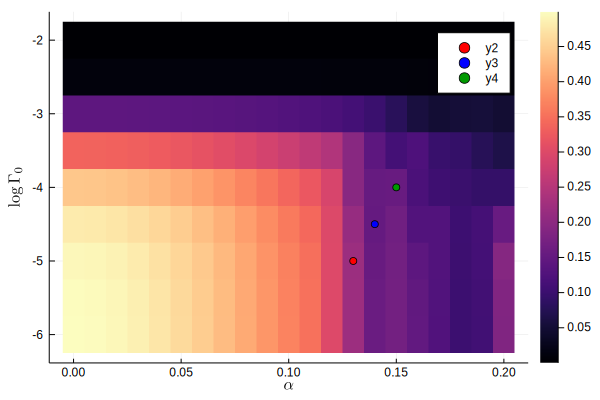

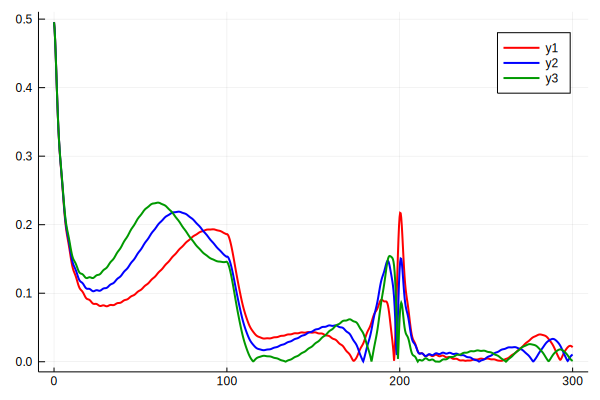

In [406]:
gammas = []
for idx = 1:size(Lj,1)
    push!(gammas, log10(Lj[idx][1][1,2].^2) )
end

ω_log = log10.(ω)
ω_log[1] = -3;

plt1 = plot()
heatmap!(α,ω_log,M_max[:,:,5]')
xlabel!(L"\alpha")
ylabel!(L"\log{\omega}")
display(plt1)
#savefig(plt1,"Mmax_vs_alpha_omega.png")

tar_mat = [ [ 8, 1, 4],
            [10, 1, 5],
            [12, 1, 6]];

tar_mat = [ [10, 1, 4],
            [12, 1, 5],
            [13, 1, 6]]; 

tar_mat = [ [14, 1, 3],
            [15, 1, 4],
            [16, 1, 5]]; 

tar1 = tar_mat[1];
tar2 = tar_mat[2];
tar3 = tar_mat[3];


tar1_c = RGB(1,0,0)
tar2_c = RGB(0,0,1)
tar3_c = RGB(0,.6,0)

plt2 = plot()
heatmap!(α,gammas,M_max[:,1,:]', fill=:magma)
scatter!([α[tar1[1]]],[gammas[tar1[3]]],color=tar1_c)
scatter!([α[tar2[1]]],[gammas[tar2[3]]],color=tar2_c)
scatter!([α[tar3[1]]],[gammas[tar3[3]]],color=tar3_c)

xlabel!(L"\alpha")
ylabel!(L"\log{\Gamma_0}")
display(plt2)
#savefig(plt2,"Mmax_vs_alpha_gamma.png")


plt3 = plot()
plot!(t,broadcast(abs, M_list[tar1[1],tar1[2],tar1[3]]),color=tar1_c, lw=2)
plot!(t,broadcast(abs, M_list[tar2[1],tar2[2],tar2[3]]),color=tar2_c, lw=2)
plot!(t,broadcast(abs, M_list[tar3[1],tar3[2],tar3[3]]),color=tar3_c, lw=2)

display(plt3)
#savefig(plt3,"Mmax_vs_alpha_gamma_insets.png")


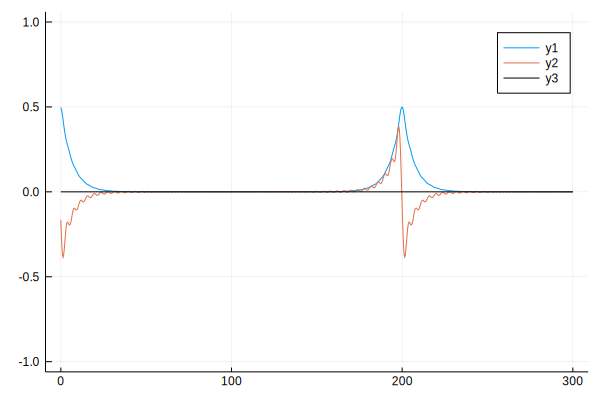

941


In [312]:
#tar2 = [15,1,3];
#tar2 = [5,1,5];
tar2 = [1,1,1];

using FiniteDiff

M = broadcast(abs,M_list[tar2[1],tar2[2],tar2[3]]);
M_grad = diff(M) ./ diff(t)
println(length(M_grad))

n = 2;
#M_grad = [sum(M_grad[i:(i+n-1)])/n for i in 1:(length(M_grad)-(n-1))]
#num_p = n+1;
#split = n/2-1;
#for idx = 1:num_p-split
#    pushfirst!(M_grad,0)
#end
#for idx = 1:split-1
#    push!(M_grad,0)
#end
push!(M_grad,0)

plt = plot()
plot!(t,M)
plot!(t,M_grad*5)
yaxis!([-1, 1])
plot!(t,0*M_grad,color=RGB(0,0,0))

display(plt)
